# Project 4 - Regression Analysis

## Dataset: Suicide Rates Overview

### Osama Hassen

In [1]:
# Import library
import pandas  as pd #Data manipulation
import numpy as np #Data manipulation
import matplotlib.pyplot as plt # Visualization
import seaborn as sns #Visualization
plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['font.size'] =14
#plt.rcParams.keys()

In [594]:
# Import dataset
#path ='dataset/'
#path = '../input/'
columns = [0,1,2,3,4,5,6,9,10,11] #Only using columns of interest
path = './'
df = pd.read_csv(path+'master.csv', usecols = columns)
print('\nNumber of rows and columns in the data set: ',df.shape)
print('')

#Lets look into top few rows and columns in the dataset
df.head()


Number of rows and columns in the data set:  (27820, 10)



,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,"2,156,624,900",796,Boomers


### Data Exploration

In [33]:
df.describe()

,year,suicides_no,population,suicides/100k pop,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,126352.000000


### Check for missing values

Text(0.5, 1.0, 'Missing value in the dataset')

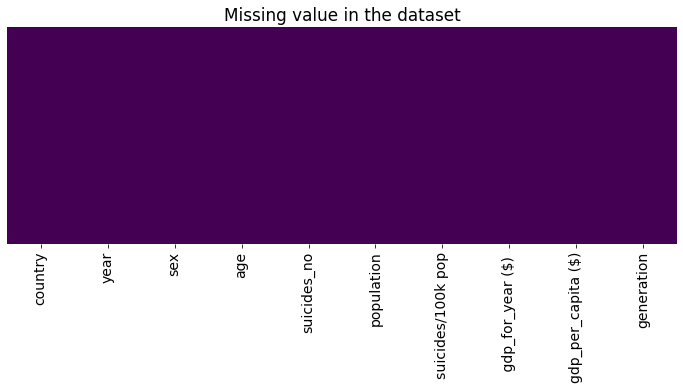

In [29]:
plt.figure(figsize=(12,4))
sns.heatmap(df.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing value in the dataset')

In [685]:
cntrs_df=df[['country', ' gdp_for_year ($) ', 'gdp_per_capita ($)']].copy()
cntrs_df.drop_duplicates(inplace=True, ignore_index=True)
cntrs_df.head(30)

,country,gdp_for_year ($),gdp_per_capita ($)
0,Albania,"2,156,624,900",796
1,Albania,"2,126,000,000",769
2,Albania,"2,335,124,988",833
3,Albania,"709,452,584",251
4,Albania,"1,228,071,038",437
5,Albania,"1,985,673,798",697
6,Albania,"2,424,499,009",835
7,Albania,"3,314,898,292",1127
8,Albania,"2,359,903,108",793
9,Albania,"2,707,123,772",899


##### No missing data in columns of interest

<AxesSubplot:>

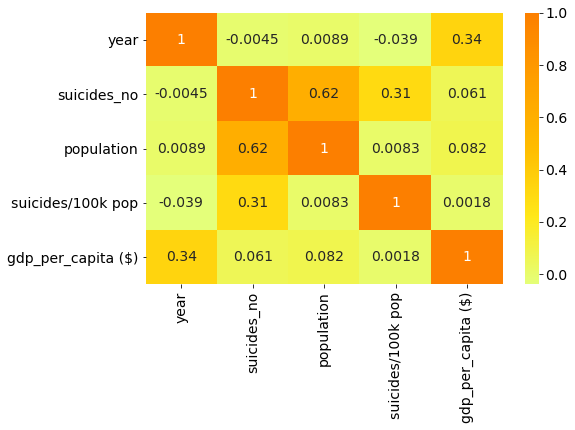

In [30]:
#Question 1
''' Plot a heatmap of Pearson correlation matrix of dataset columns. Report which
features have the highest absolute correlation with the target variable and what
that implies.'''

# correlation plot
corr = df.corr()
sns.heatmap(corr, cmap = 'Wistia', annot= True)

##### Target variables are suicides_no & suicides/100k pop. suicide_no has the highest correlation with 'population' (at 0.62). This is expected since the higher the populaiton of a given country, the higher the number of suicides would be intuitively. 

##### 'suicides/100k pop' has the highest correlation with suicide_no (at 0.31) which is expected and deoesn't tell us anything new about the data. In fact, the suicide rate is designed to remove the influence of the population of the country on the suicide number (i.e. normalize against population size) so it makes sense that it has a decent correlation with the raw suicide number and almost no correlation with population (the removed influence)

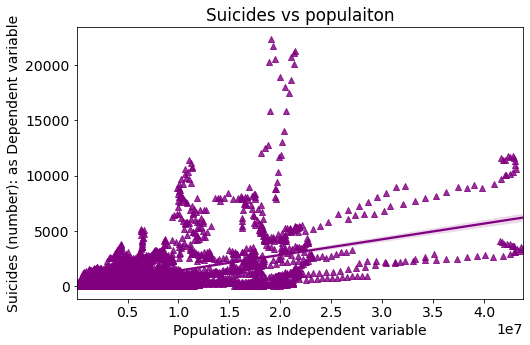

In [31]:
#Scatter plot of suicide numbers vs. population

sns.regplot(x='population',y='suicides_no',data=df,marker='^',color='purple')
plt.xlabel('Population: as Independent variable')
plt.ylabel('Suicides (number): as Dependent variable')
plt.title('Suicides vs populaiton');

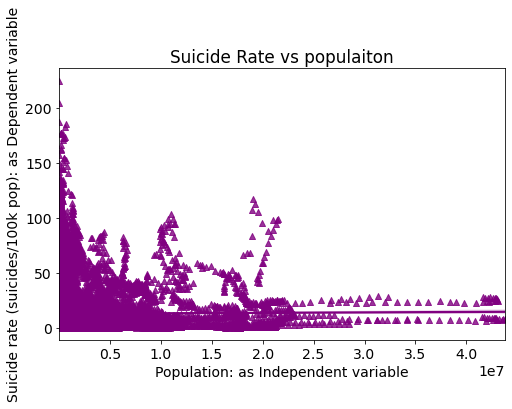

In [32]:
#Scatter plot of suicide rate vs. population

sns.regplot(x='population',y='suicides/100k pop',data=df,marker='^',color='purple')
plt.xlabel('Population: as Independent variable')
plt.ylabel('Suicide rate (suicides/100k pop): as Dependent variable')
plt.title('Suicide Rate vs populaiton');

(0.0, 300.0, 0.0, 20000.0)

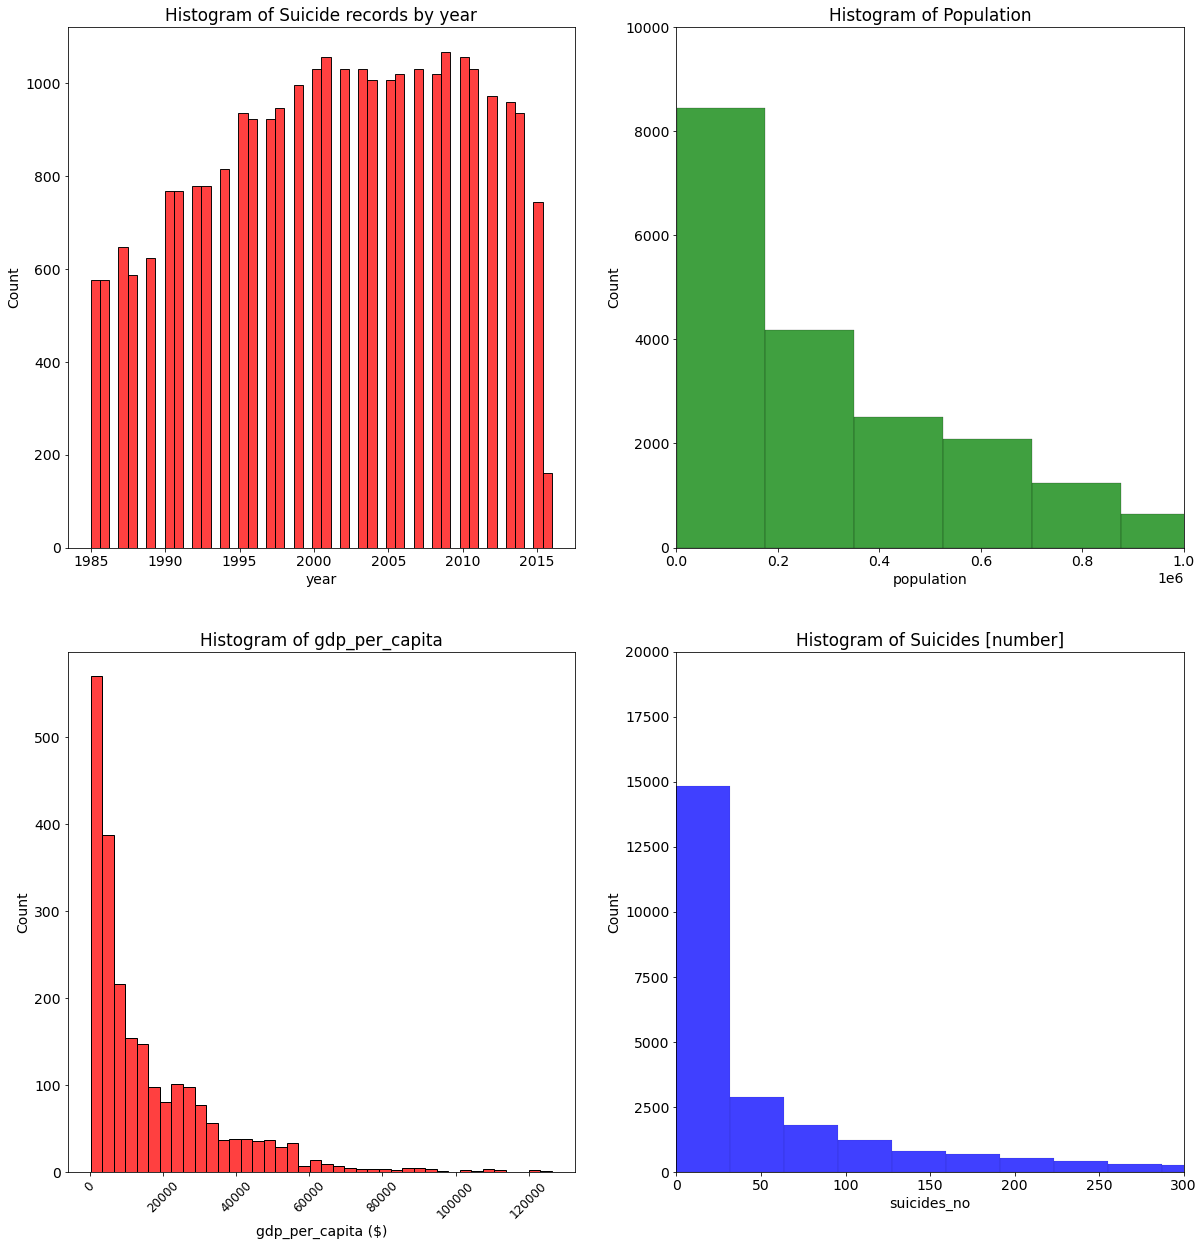

In [688]:
#Question 2
''' Plot the histogram of numerical features. What preprocessing can be done if the
distribution of a feature has high skewness? '''

f= plt.figure(figsize=(20,90))

ax=f.add_subplot(821)
sns.histplot(df['year'],bins=50,color='r',ax=ax)
ax.set_title('Histogram of Suicide records by year')

#ax=f.add_subplot(822)
#sns.histplot(df['age'],color='b',ax=ax)
#ax.set_title('Histogram of age')
#plt.xticks(rotation=45, fontsize=12)
#plt.axis([-1,6, 0, 5000])

ax=f.add_subplot(822)
sns.histplot(df['population'], bins=250, color='g',ax=ax)
ax.set_title('Histogram of Population')
plt.axis([-1,1000000, 0,10000])

ax=f.add_subplot(823)
sns.histplot(cntrs_df['gdp_per_capita ($)'],bins=40,color='r',ax=ax)
ax.set_title('Histogram of gdp_per_capita')
plt.xticks(rotation=45, fontsize=12)
#plt.axis([0,80000, 0,8000])

ax=f.add_subplot(824)
sns.histplot(df['suicides_no'],bins=700,color='b',ax=ax)
ax.set_title('Histogram of Suicides [number]')
plt.axis([0,300, 0,20000])

#ax=f.add_subplot(826)
#sns.histplot(np.log10(df[' gdp_for_year ($) ']),bins=50,color='r',ax=ax)
#ax.set_title('Histogram of gdp_for_year')

array([[<AxesSubplot:title={'center':'gdp_per_capita ($)'}>]],
      dtype=object)

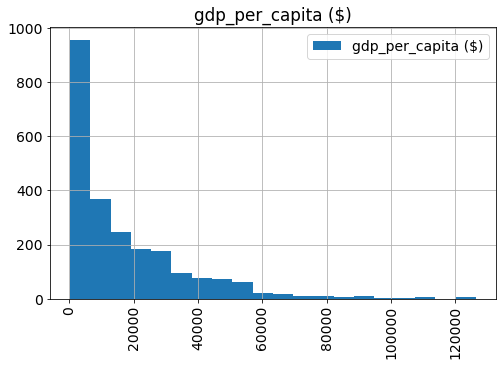

In [691]:
cntrs_df.hist(bins=20, grid=True, legend=True, xrot=90)

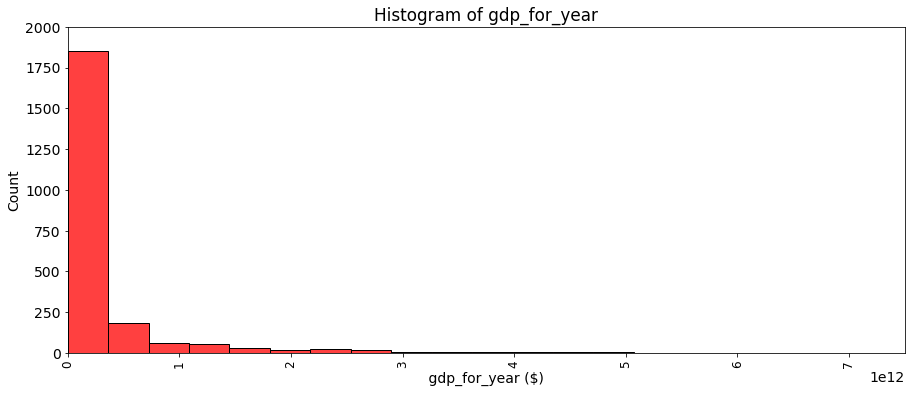

In [738]:
f= plt.figure(figsize=(15,6))
ax=f.add_subplot(111)
sns.histplot(cntrs_df[' gdp_for_year ($) '], color='r', bins=50, ax=ax)
ax.set_title('Histogram of gdp_for_year')
plt.xticks(rotation='vertical', fontsize=12)
plt.axis([0,0.75e13,0,2000])
plt.show()

array([[<AxesSubplot:title={'center':'suicides/100k pop'}>]], dtype=object)

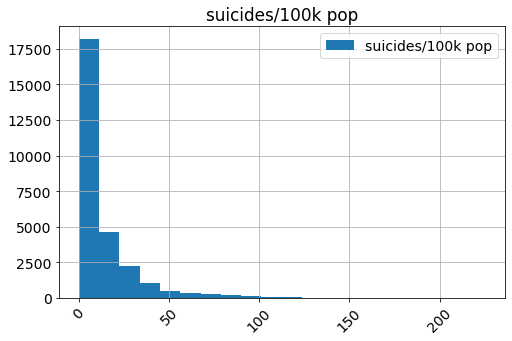

In [737]:
df.hist(column='suicides/100k pop', bins=20, grid=True, legend=True, xrot=45)

In [719]:
for m in cntrs_df.index:
    d=cntrs_df.loc[m, ' gdp_for_year ($) ']
    e=float(d.replace(',',''))
    cntrs_df.loc[m, ' gdp_for_year ($) '] = e
    
cntrs_df.head()


,country,gdp_for_year ($),gdp_per_capita ($)
0,Albania,2.15662e+09,796
1,Albania,2.126e+09,769
2,Albania,2.33512e+09,833
3,Albania,7.09453e+08,251
4,Albania,1.22807e+09,437


In [729]:
from scipy.stats import boxcox
y_bc,lam, ci= boxcox(df_encode['charges'],alpha=0.05)
ci,lam


(2321, 3)

(0.0, 1000.0)

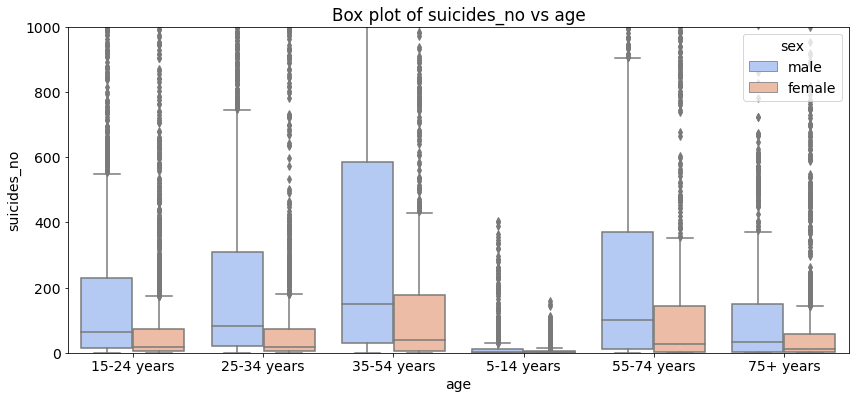

In [245]:
#Question 3
'''Inspect box plot of categorical features vs target variable. What intuition do you
get?'''

plt.figure(figsize=(14,6))
sns.boxplot(x='age', y='suicides_no',hue='sex',data=df.sort_values('age'),palette='coolwarm')
plt.title('Box plot of suicides_no vs age')
plt.ylim(0, 1000)


(0.0, 1000.0)

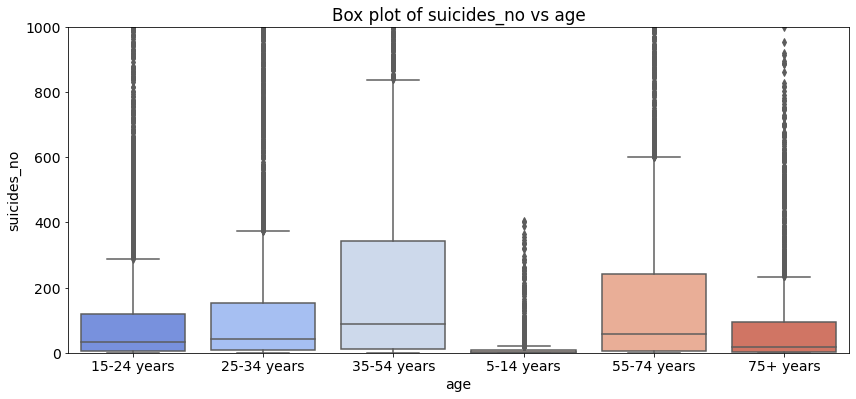

In [244]:
plt.figure(figsize=(14,6))
sns.boxplot(x='age', y='suicides_no', data=df.sort_values('age'),palette='coolwarm')
plt.title('Box plot of suicides_no vs age')
plt.ylim(0, 1000)


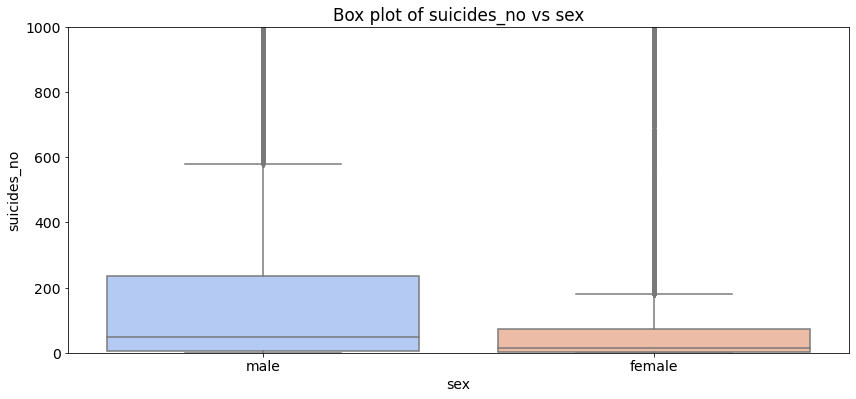

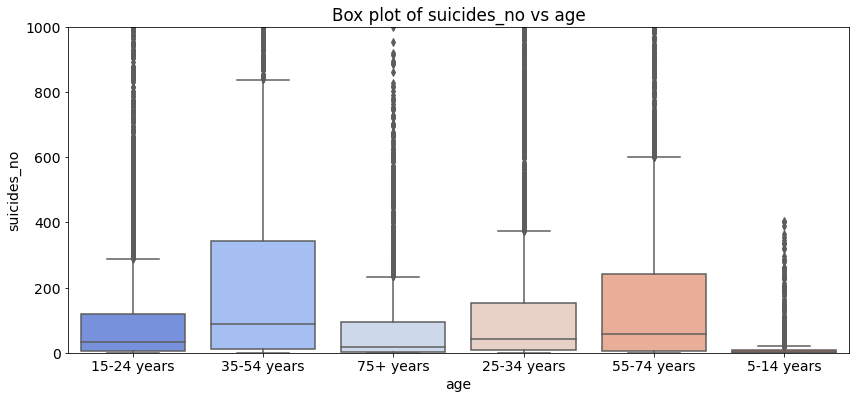

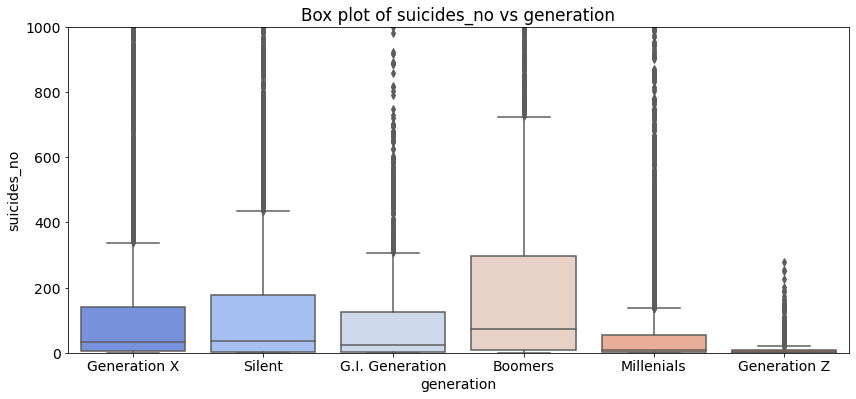

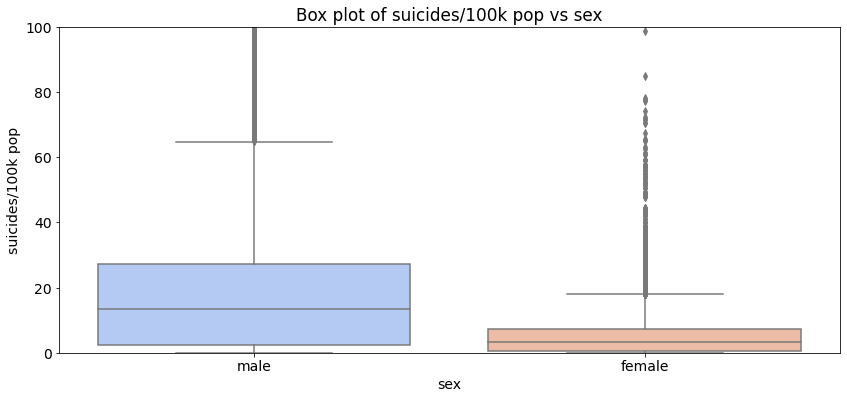

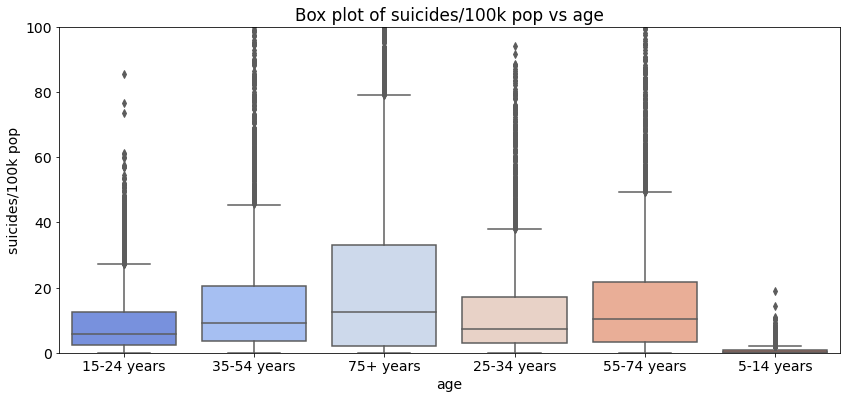

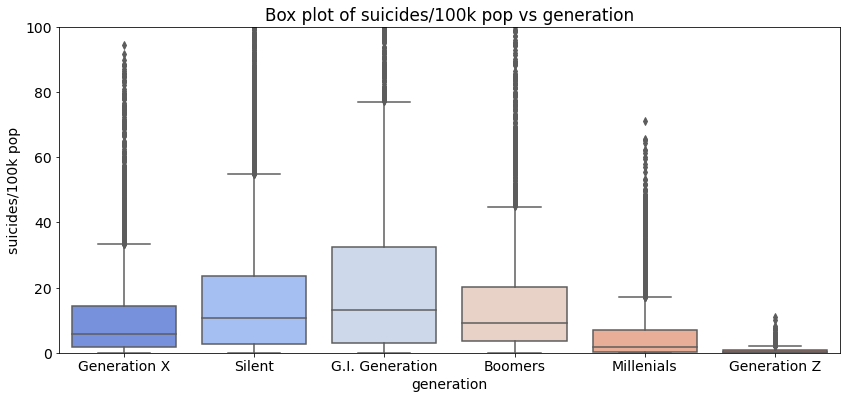

In [247]:
targets = ['suicides_no', 'suicides/100k pop']
categories = ['sex', 'age', 'generation']

for i in targets:
    for j in categories:
        plt.figure(figsize=(14,6))
        sns.boxplot(x=j, y=i, data=df,palette='coolwarm')
        plt.title('Box plot of %s vs %s' % (i, j))
        if i == 'suicides_no':
            plt.ylim(0, 1000)
        else:
            plt.ylim(0, 100)



In [337]:
#Question 5
'''For the suicide rate dataset, pick the top 10 countries that have the longest time-span of records (in terms of years). Plot the suicide rate (“suicides/100k pop”)
against time for different age groups and gender, and explain your observations
(Hint: try seaborn.relplot)'''

top10_span_yrs = ['Austria', 'Grenada', 'Iceland', 'Mauritius', 'Netherlands', 'Thailand', 'Antigua and Barbuda', 'Argentina', 'Australia', 'Belgium']


In [407]:
#print(cysa_df)
#
#print(cysa_df.loc[4, ['country', 'age']])
#print(top10_span_yrs)

t10_df=df.query("country in ['Austria', 'Grenada', 'Iceland', 'Mauritius', 'Netherlands', 'Thailand', 'Antigua and Barbuda', 'Argentina', 'Australia', 'Belgium']")
print(t10_df.head(10))


                 country  year     sex          age  suicides_no  population  \
264  Antigua and Barbuda  1985  female  15-24 years            0        7709   
265  Antigua and Barbuda  1985  female  25-34 years            0        6344   
266  Antigua and Barbuda  1985  female  35-54 years            0        6173   
267  Antigua and Barbuda  1985  female   5-14 years            0        7339   
268  Antigua and Barbuda  1985  female  55-74 years            0        3778   
269  Antigua and Barbuda  1985  female    75+ years            0         949   
270  Antigua and Barbuda  1985    male  15-24 years            0        7667   
271  Antigua and Barbuda  1985    male  25-34 years            0        6194   
272  Antigua and Barbuda  1985    male  35-54 years            0        5970   
273  Antigua and Barbuda  1985    male   5-14 years            0        7304   

     suicides/100k pop  gdp_for_year ($)   gdp_per_capita ($)       generation  
264                0.0        240,923,

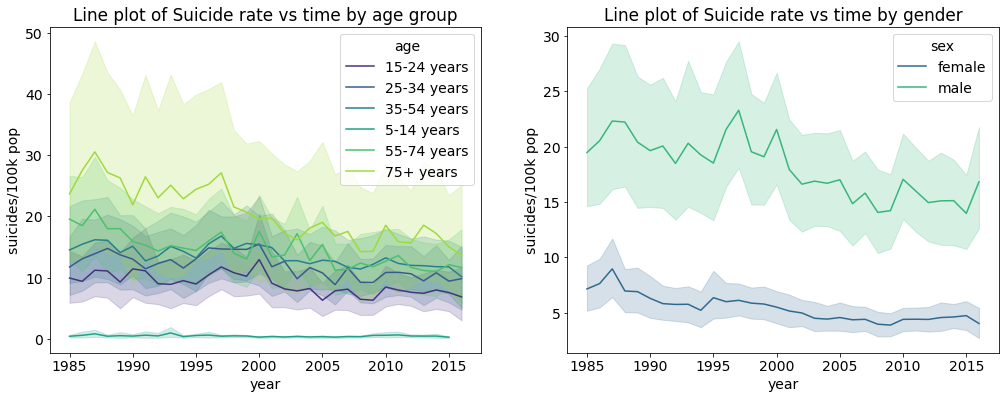

In [415]:
#Plot the suicide rate (“suicides/100k pop”) vs time for different age groups and gender, and explain your observations

f = plt.figure(figsize=(17,6))
ax = f.add_subplot(121)
sns.lineplot(x='year',y='suicides/100k pop',data=t10_df,palette='viridis',hue='age',ax=ax)
ax.set_title('Line plot of Suicide rate vs time by age group')

ax = f.add_subplot(122)
sns.lineplot(x='year',y='suicides/100k pop',data=t10_df,palette='viridis',hue='sex')
ax.set_title('Line plot of Suicide rate vs time by gender')
plt.savefig('sc.png');

#### In the filtered data (top 10 countries with data time span), the overall trend of suicide rates over the years is a downward trend for (almost) all age groups and both genders. In the plot by age group, senior in the 75+ age group seem to commit suicides at a consistently higher rate than younger adults despite the downward trend. The rate is lowest for the youngest age group (5-14 years) and remains relatively flat over time. The other 4 age groups have suicide rates that fall in between the other 2; ranging approximately between 10 and 20 suicides per 100,000 people.

#### The suicide rate by gender group shows tha males commit suicide at approximately 3 times the rate of females with both having an overall downard trend over time.

In [419]:
#tempdf=t10_df[t10_df['age'] == "55-74 years"]
#newdf=t10_df[t10_df['age'] == "5-14 years"]

#apdf=tempdf.append(newdf[newdf['age'] == '5-14 years'], ignore_index=True)

#print(tempdf)
#print(newdf)

In [563]:
#Question 7
''' Can you explain a trade-off
here (between one-hot and label encoding)? (Hint: let us assume we perform linear regression, what information does one-hot
encoding discard, and what assumption should hold strongly if we perform the scalar
encoding instead?) (Question 7)
For the suicide rate dataset, the number of unique countries for the variable “country” is
pretty high. We suggest you to group these countries into same continent countries such
as Europe, North America, South America, Middle East and Asia. Using a new variable
with lower number of classes in this category, you may proceed with one-hot encoding'''

path = './'
ccdf = pd.read_csv(path+'continent_country.csv')
print(ccdf.head())
print(df.shape)
print(ccdf.shape)



  Continent   Country
0    Africa   Algeria
1    Africa    Angola
2    Africa     Benin
3    Africa  Botswana
4    Africa   Burkina
(27820, 11)
(194, 2)


#### Numerical (or label) encoding has the advantage of maintaining the granularity of the data within a single column. However, the fact that categories are changed to integers means that the model will "rank" the categories when there is no actual ranking to the values. 
#### One-hot encoding gets rid of the issue of ranking categories but the trade off is that, since the feature in question will be converted from a single column to multiple 0/1 columns (one for each unique value), it creates many dummy variables for the given feature. This in turn causes a false high correlation between those columns/features creating a multicollinearity problem.

In [665]:
#Creating n_df and adding 'continent' field
n_df=df.copy()

for n in ccdf.index:
    x=ccdf.loc[n,'Country']
    y=ccdf.loc[n,'Continent']
    n_df.loc[n_df['country'] == x,'continent'] = str(y)
       

n_df.tail()

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation,continent
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,"63,067,077,179",2309,Generation X,Asia
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,"63,067,077,179",2309,Silent,Asia
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,"63,067,077,179",2309,Generation Z,Asia
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,"63,067,077,179",2309,Generation Z,Asia
27819,Uzbekistan,2014,female,55-74 years,21,1438935,1.46,"63,067,077,179",2309,Boomers,Asia


In [669]:
ndf=n_df.copy()
#ndf= ndf.drop(['country'], axis=1) 
ndf.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation,continent
0,Albania,1987,male,15-24 years,21,312900,6.71,"2,156,624,900",796,Generation X,Europe
1,Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",796,Silent,Europe
2,Albania,1987,female,15-24 years,14,289700,4.83,"2,156,624,900",796,Generation X,Europe
3,Albania,1987,male,75+ years,1,21800,4.59,"2,156,624,900",796,G.I. Generation,Europe
4,Albania,1987,male,25-34 years,9,274300,3.28,"2,156,624,900",796,Boomers,Europe


In [670]:
# Dummy variable
categorical_columns = ['continent','sex', 'age', 'generation']
df_encode = pd.get_dummies(data = ndf, prefix = None, prefix_sep='_',
               columns = categorical_columns,
               drop_first =True,
              dtype='int8')

In [673]:
# Lets verify the dummy variable process
print('Columns in original data frame:\n',ndf.columns.values)
print('\nNumber of rows and columns in the dataset:',ndf.shape)
print('\nColumns in data frame after encoding dummy variable:\n',df_encode.columns.values)
print('\nNumber of rows and columns in the dataset:',df_encode.shape)
df_encode.head(30)

Columns in original data frame:
 ['country' 'year' 'sex' 'age' 'suicides_no' 'population'
 'suicides/100k pop' ' gdp_for_year ($) ' 'gdp_per_capita ($)'
 'generation' 'continent']

Number of rows and columns in the dataset: (27820, 11)

Columns in data frame after encoding dummy variable:
 ['country' 'year' 'suicides_no' 'population' 'suicides/100k pop'
 ' gdp_for_year ($) ' 'gdp_per_capita ($)' 'continent_Asia'
 'continent_Europe' 'continent_North America' 'continent_Oceania'
 'continent_South America' 'sex_male' 'age_25-34 years' 'age_35-54 years'
 'age_5-14 years' 'age_55-74 years' 'age_75+ years'
 'generation_G.I. Generation' 'generation_Generation X'
 'generation_Generation Z' 'generation_Millenials' 'generation_Silent']

Number of rows and columns in the dataset: (27820, 23)


,country,year,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),continent_Asia,continent_Europe,continent_North America,...,age_25-34 years,age_35-54 years,age_5-14 years,age_55-74 years,age_75+ years,generation_G.I. Generation,generation_Generation X,generation_Generation Z,generation_Millenials,generation_Silent
0,Albania,1987,21,312900,6.71,"2,156,624,900",796,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,Albania,1987,16,308000,5.19,"2,156,624,900",796,0,1,0,...,0,1,0,0,0,0,0,0,0,1
2,Albania,1987,14,289700,4.83,"2,156,624,900",796,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,Albania,1987,1,21800,4.59,"2,156,624,900",796,0,1,0,...,0,0,0,0,1,1,0,0,0,0
4,Albania,1987,9,274300,3.28,"2,156,624,900",796,0,1,0,...,1,0,0,0,0,0,0,0,0,0
5,Albania,1987,1,35600,2.81,"2,156,624,900",796,0,1,0,...,0,0,0,0,1,1,0,0,0,0
6,Albania,1987,6,278800,2.15,"2,156,624,900",796,0,1,0,...,0,1,0,0,0,0,0,0,0,1
7,Albania,1987,4,257200,1.56,"2,156,624,900",796,0,1,0,...,1,0,0,0,0,0,0,0,0,0
8,Albania,1987,1,137500,0.73,"2,156,624,900",796,0,1,0,...,0,0,0,1,0,1,0,0,0,0
9,Albania,1987,0,311000,0.00,"2,156,624,900",796,0,1,0,...,0,0,1,0,0,0,1,0,0,0
